In [1]:
import illustris_python.groupcat as gc
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import h5py
import study_pairs_abacus as spa
import abacus_cosmos.Halos as ach
%matplotlib inline
plt.style.use('astroandes.mplstyle')

In [2]:
# Observational data

vlim = {'mean':627, 'sigma':22}

n_values = 1000
mu_values = np.zeros(n_values)
for i in range(n_values):
    l_cmb = np.deg2rad(264.0 + np.random.normal(loc=0.0, scale=3.0))  
    b_cmb = np.deg2rad(48.0 + np.random.normal(loc=0.0, scale=3.0))
    l_m31 = np.deg2rad(121.0 + np.random.normal(loc=0.0, scale=3.0))  
    b_m31 = np.deg2rad(-21 + np.random.normal(loc=0.0, scale=3.0))

    u_cmb = np.array([np.cos(l_cmb)*np.cos(b_cmb), np.sin(l_cmb) * np.cos(b_cmb), np.sin(b_cmb)])
    u_m31 = np.array([np.cos(l_m31)*np.cos(b_m31), np.sin(l_m31) * np.cos(b_m31), np.sin(b_m31)])

    mu_values[i]  = np.sum(u_cmb*u_m31)

mu = {}
mu['mean'] = np.mean(mu_values)
mu['sigma'] = np.std(mu_values)
print(mu)

vlim_sim = {'mean':310.25, 'sigma':vlim['sigma']}
mu_sim = {'mean':-0.85, 'sigma':mu['sigma']}

{'mean': -0.7619911966501834, 'sigma': 0.04099665094044247}


In [80]:
n_boxes = 20
all_data = {}
for i in range(n_boxes):
    all_data[i] = spa.load_box(BoxID=i, fixed_cosmo=True)

data = {}
keys = ['vel_A_mag', 'vel_B_mag', 'pos_AB', 'vel_AB', 'vel_AB_rad', 'vel_AB_tan', 'vmax_A', 'vmax_B', 'mu', 'mu_vv', 'mu_cm', 'vel_CM_mag']
for kk in keys:
    tmp = np.empty((0))
    for i in range(n_boxes):
        tmp = np.append(tmp, all_data[i][kk])
    data[kk] = tmp


Finished reading ../data/pairs_planck_00_box_00.hdf5
Finished reading ../data/pairs_planck_00_box_01.hdf5
Finished reading ../data/pairs_planck_00_box_02.hdf5
Finished reading ../data/pairs_planck_00_box_03.hdf5
Finished reading ../data/pairs_planck_00_box_04.hdf5
Finished reading ../data/pairs_planck_00_box_05.hdf5
Finished reading ../data/pairs_planck_00_box_06.hdf5
Finished reading ../data/pairs_planck_00_box_07.hdf5
Finished reading ../data/pairs_planck_00_box_08.hdf5
Finished reading ../data/pairs_planck_00_box_09.hdf5
Finished reading ../data/pairs_planck_00_box_10.hdf5
Finished reading ../data/pairs_planck_00_box_11.hdf5
Finished reading ../data/pairs_planck_00_box_12.hdf5
Finished reading ../data/pairs_planck_00_box_13.hdf5
Finished reading ../data/pairs_planck_00_box_14.hdf5
Finished reading ../data/pairs_planck_00_box_15.hdf5
Finished reading ../data/pairs_planck_00_box_16.hdf5
Finished reading ../data/pairs_planck_00_box_17.hdf5
Finished reading ../data/pairs_planck_00_box_1

In [81]:
# Selection in vmax and kinematics
ii = (data['vmax_A']<240) & (data['vmax_B']<240) 
ii &= (data['vel_AB_rad']<0) 
ii &= (np.abs(data['vel_AB_rad'])>np.abs(data['vel_AB_tan']))
jj = data['mu_cm'] < (mu['mean']+mu['sigma']) 
kk = data['vel_CM_mag'] > (vlim['mean']-vlim['sigma'])
print(np.count_nonzero(ii), np.mean(data['vel_A_mag'][ii]), np.std(data['vel_A_mag'][ii]))
print(np.count_nonzero(ii&jj), np.mean(data['vel_A_mag'][ii&jj]), np.std(data['vel_A_mag'][ii&jj])/np.sqrt(np.count_nonzero(ii&jj)))
ll = np.abs(data['vel_A_mag'] - np.mean(data['vel_A_mag'][ii&jj]))<vlim['sigma']
mm = np.abs(data['vel_A_mag'] - vlim['mean'])<vlim['sigma']
print(np.count_nonzero(ii&jj&kk), np.count_nonzero(ii&jj&kk)/np.count_nonzero(ii&jj))
print(np.count_nonzero(ii&jj&ll), np.count_nonzero(ii&jj&mm), np.count_nonzero(ii&jj&ll)/np.count_nonzero(ii&jj&mm))


29292 461.1129882123388 207.56140758461845
4168 386.1803009846389 3.081350181972512
868 0.20825335892514396
372 150 2.48


29292


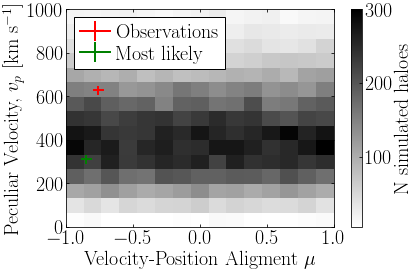

In [82]:
_ =plt.hist2d(data['mu_cm'][ii], data['vel_CM_mag'][ii], bins=15, range=[[-1,1], [0, 1000]], cmap='binary')
plt.errorbar([mu['mean']], [vlim['mean']], [vlim['sigma']], [mu['sigma']], color='red', label='Observations')
plt.errorbar([mu_sim['mean']], [vlim_sim['mean']], [vlim_sim['sigma']], [mu_sim['sigma']], color='green', label='Most likely')

plt.colorbar(label='N simulated haloes')
plt.ylim(0,1000)
plt.xlim(-1,1)
plt.xlabel('Velocity-Position Aligment $\mu$')
plt.ylabel('Peculiar Velocity, $v_p$ [km s$^{-1}$]')
plt.legend(loc=2)
bbox_inches="tight"

print(len(data['mu'][ii]))
plt.savefig("../paper/mu_v_pec_histo.pdf",  bbox_inches="tight")


29292


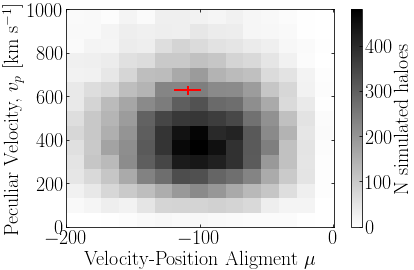

In [83]:
_ =plt.hist2d(data['vel_AB_rad'][ii], data['vel_CM_mag'][ii], bins=15, range=[[-200,0], [0, 1000]], cmap='binary')
plt.errorbar([-109], [vlim['mean']], [vlim['sigma']], [10], color='red', label='Observations')
#plt.errorbar([mu_sim['mean']], [vlim_sim['mean']], [vlim_sim['sigma']], [mu_sim['sigma']], color='green', label='Most likely')

plt.colorbar(label='N simulated haloes')
plt.ylim(0,1000)
plt.xlim(-200,1)
plt.xlabel('Velocity-Position Aligment $\mu$')
plt.ylabel('Peculiar Velocity, $v_p$ [km s$^{-1}$]')
#plt.legend(loc=2)
bbox_inches="tight"

print(len(data['mu'][ii]))
plt.savefig("../paper/rad_pec_histo.pdf",  bbox_inches="tight")


29292


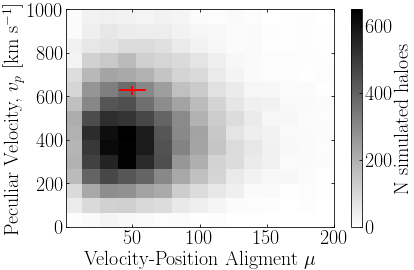

In [84]:
_ =plt.hist2d(data['vel_AB_tan'][ii], data['vel_CM_mag'][ii], bins=15, range=[[0,200], [0, 1000]], cmap='binary')
plt.errorbar([50], [vlim['mean']], [vlim['sigma']], [10], color='red', label='Observations')
#plt.errorbar([mu_sim['mean']], [vlim_sim['mean']], [vlim_sim['sigma']], [mu_sim['sigma']], color='green', label='Most likely')

plt.colorbar(label='N simulated haloes')
plt.ylim(0,1000)
plt.xlim(1,200)
plt.xlabel('Velocity-Position Aligment $\mu$')
plt.ylabel('Peculiar Velocity, $v_p$ [km s$^{-1}$]')
#plt.legend(loc=2)
bbox_inches="tight"

print(len(data['mu'][ii]))
plt.savefig("../paper/tan_pec_histo.pdf",  bbox_inches="tight")


0.17940051891301378
450.1262635344872 203.3056695582697


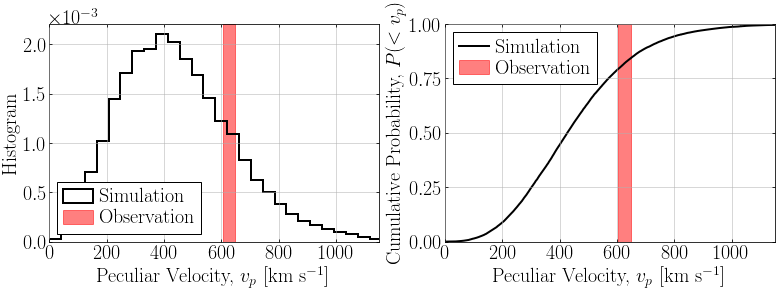

In [85]:
plt.figure(figsize=(13,4))

ax = plt.subplot(1,2,1)
ax.ticklabel_format(style='sci', scilimits=(0,5))

plt.hist(data['vel_CM_mag'][ii], 
         bins=np.linspace(0,1200,30),
         density=True, histtype='step', color='black', label='Simulation',
         linewidth=2)
plt.axvspan(vlim['mean']-vlim['sigma'], vlim['mean']+vlim['sigma'], 
            alpha=0.5, color='red', label='Observation')
plt.legend(loc=3)
plt.xticks(np.linspace(0,1200,7))
plt.xlim([0,1150])

plt.grid(linewidth=0.5)

plt.xlabel("Peculiar Velocity, $v_p$ [km s$^{-1}$]")
plt.ylabel("Histogram")

plt.subplot(1,2,2)

plt.axvspan(vlim['mean']-vlim['sigma'], vlim['mean']+vlim['sigma'], 
            alpha=0.5, color='red', label='Observation')

plt.plot(np.sort(data['vel_CM_mag'][ii]), 
         np.linspace(0,1,np.count_nonzero(ii)), 
         color='black', label='Simulation')

plt.legend()
plt.grid(linewidth=0.5)
plt.yticks(np.linspace(0,1,5))
plt.xticks(np.linspace(0,1200,7))
plt.xlim([0,1150])
plt.ylim([0,1])
plt.xlabel('Peculiar Velocity, $v_p$ [km s$^{-1}$]')
plt.ylabel("Cumulative Probability, $P(<v_p)$")

plt.savefig("../paper/cumulative_probability.pdf",  bbox_inches="tight")
print(np.count_nonzero(ii&(data['vel_CM_mag']>vlim['mean']))/np.count_nonzero(ii))
print(np.mean(data['vel_CM_mag'][ii]), np.std(data['vel_CM_mag'][ii]))

0.2038939967550027


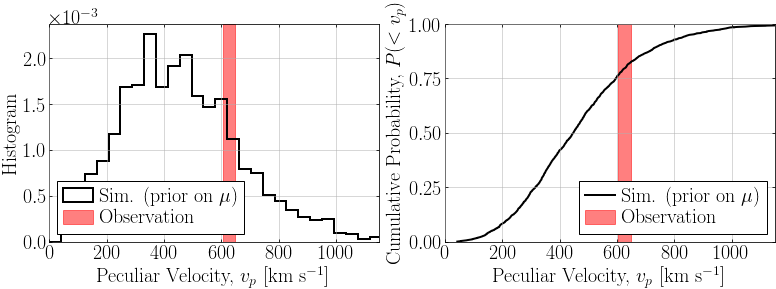

In [57]:
plt.figure(figsize=(13,4))

ax = plt.subplot(1,2,1)
ax.ticklabel_format(style='sci', scilimits=(0,5))

mu_ii = (data['mu_cm']>(mu['mean']-mu['sigma'])) & (data['mu_cm']<(mu['mean']+mu['sigma']))

plt.hist(data['vel_CM_mag'][ii&mu_ii], 
         bins=np.linspace(0,1200,30),
         density=True, histtype='step', color='black', label='Sim. (prior on $\mu$)',
         linewidth=2)
plt.axvspan(vlim['mean']-vlim['sigma'], vlim['mean']+vlim['sigma'], 
            alpha=0.5, color='red', label='Observation')
plt.legend(loc=3)
plt.xticks(np.linspace(0,1200,7))
plt.xlim([0,1150])

plt.grid(linewidth=0.5)

plt.xlabel("Peculiar Velocity, $v_p$ [km s$^{-1}$]")
plt.ylabel("Histogram")

plt.subplot(1,2,2)

plt.axvspan(vlim['mean']-vlim['sigma'], vlim['mean']+vlim['sigma'], 
            alpha=0.5, color='red', label='Observation')


plt.plot(np.sort(data['vel_CM_mag'][ii&mu_ii]), 
         np.linspace(0,1,np.count_nonzero(ii&mu_ii)), 
         color='black', label='Sim. (prior on $\mu$)')

plt.legend()
plt.grid(linewidth=0.5)
plt.yticks(np.linspace(0,1,5))
plt.xticks(np.linspace(0,1200,7))
plt.xlim([0,1150])
plt.ylim([0,1])
plt.xlabel('Peculiar Velocity, $v_p$ [km s$^{-1}$]')
plt.ylabel("Cumulative Probability, $P(<v_p)$")

plt.savefig("../paper/cumulative_probability_mu_select.pdf",  bbox_inches="tight")
print(np.count_nonzero(ii&mu_ii&(data['vel_CM_mag']>vlim['mean']))/np.count_nonzero(ii&mu_ii))

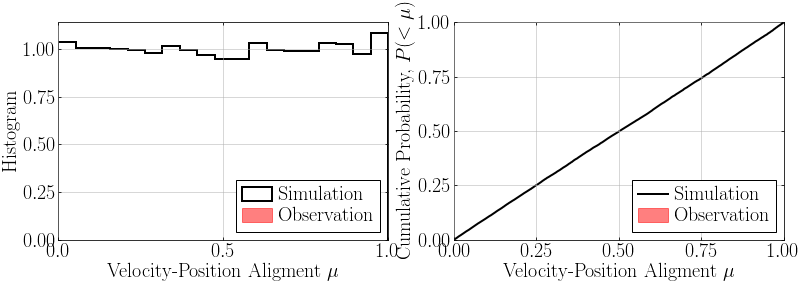

In [79]:
plt.figure(figsize=(13,4))

ax = plt.subplot(1,2,1)
ax.ticklabel_format(style='sci', scilimits=(0,5))

plt.hist(np.abs(data['mu_cm'][ii]), 
         bins=np.linspace(0,1,20),
         density=True, histtype='step', color='black', label='Simulation',
         linewidth=2)
plt.axvspan(mu['mean']-mu['sigma'], mu['mean']+mu['sigma'], 
            alpha=0.5, color='red', label='Observation')
plt.legend(loc=4)
plt.xticks(np.linspace(-1,1,5))
plt.xlim([0,1])

plt.grid(linewidth=0.5)

plt.xlabel('Velocity-Position Aligment $\mu$')
plt.ylabel("Histogram")

plt.subplot(1,2,2)

plt.axvspan(mu['mean']-mu['sigma'], mu['mean']+mu['sigma'], 
            alpha=0.5, color='red', label='Observation')

plt.plot(np.sort(np.abs(data['mu_cm'][ii])), 
         np.linspace(0,1,np.count_nonzero(ii)), 
         color='black', label='Simulation')

plt.legend(loc=4)
plt.grid(linewidth=0.5)
plt.yticks(np.linspace(0,1,5))
plt.xticks(np.linspace(0,1,5))
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Velocity-Position Aligment $\mu$')
plt.ylabel("Cumulative Probability, $P(<\mu)$")

plt.savefig("../paper/mu_cumulative_probability.pdf",  bbox_inches="tight")

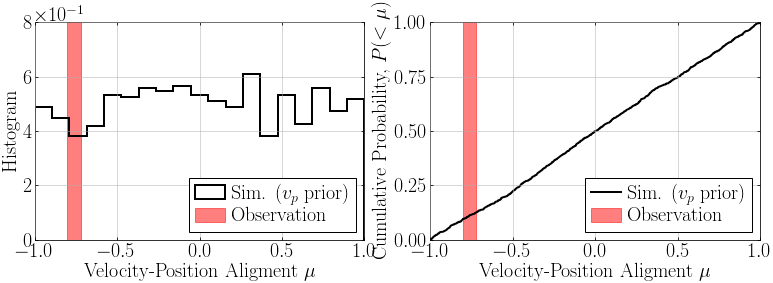

In [71]:
plt.figure(figsize=(13,4))

ax = plt.subplot(1,2,1)
ax.ticklabel_format(style='sci', scilimits=(0,5))

vel_ii = (data['vel_A_mag']>(vlim['mean']-vlim['sigma'])) & (data['vel_A_mag']<(vlim['mean']+vlim['sigma']))


plt.hist(data['mu'][ii&vel_ii], 
         bins=np.linspace(-1,1,20),
         density=True, histtype='step', color='black', label='Sim. ($v_p$ prior)',
         linewidth=2)
plt.axvspan(mu['mean']-mu['sigma'], mu['mean']+mu['sigma'], 
            alpha=0.5, color='red', label='Observation')
plt.legend(loc=4)
plt.xticks(np.linspace(-1,1,5))
plt.xlim([-1,1])
plt.ylim([0,0.8])

plt.grid(linewidth=0.5)

plt.xlabel('Velocity-Position Aligment $\mu$')
plt.ylabel("Histogram")

plt.subplot(1,2,2)

plt.axvspan(mu['mean']-mu['sigma'], mu['mean']+mu['sigma'], 
            alpha=0.5, color='red', label='Observation')

plt.plot(np.sort(data['mu'][ii&vel_ii]), 
         np.linspace(0,1,np.count_nonzero(ii&vel_ii)), 
         color='black', label='Sim. ($v_p$ prior)')

plt.legend()
plt.grid(linewidth=0.5)
plt.yticks(np.linspace(0,1,5))
plt.xticks(np.linspace(-1,1,5))
plt.xlim([-1,1])
plt.ylim([0,1])
plt.xlabel('Velocity-Position Aligment $\mu$')
plt.ylabel("Cumulative Probability, $P(<\mu)$")

plt.savefig("../paper/mu_cumulative_probability_vel_select.pdf",  bbox_inches="tight")

In [18]:
dtype=[('BoxID', 'i8'), ('individual_total', 'i8'), ('individual_high', 'i8'), 
       ('pair_total', 'i8'), ('pair_high', 'i8'), ('mean_mu_total', 'f8'), ('mean_mu_fast', 'f8'), 
      ('std_mu_total', 'f8'), ('std_mu_fast', 'f8')]
pair_data = np.loadtxt("../data/summary_pair_count.dat", dtype=dtype)

dtype=[('BoxID','i8'), ('hubble', 'f8'), ('omega_de', 'f8'),
      ('omega_m', 'f8'), ('n_s', 'f8'), ('sigma_8', 'f8'), ('w_0', 'f8')]
cosmo_data = np.loadtxt("../data/box_cosmo_params.dat", dtype=dtype)